# BIOS512 Assignment #4

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [3]:
library('tidyverse')
df = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  objectid = col_double(),
  province_territory = col_character(),
  project_name = col_character(),
  total_project_capacity_mw = col_double(),
  turbine_identifier = col_character(),
  turbine_number_in_project = col_character(),
  turbine_rated_capacity_k_w = col_double(),
  rotor_diameter_m = col_double(),
  hub_height_m = col_double(),
  manufacturer = col_character(),
  model = col_character(),
  commissioning_date = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  notes = col_character()
)




Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

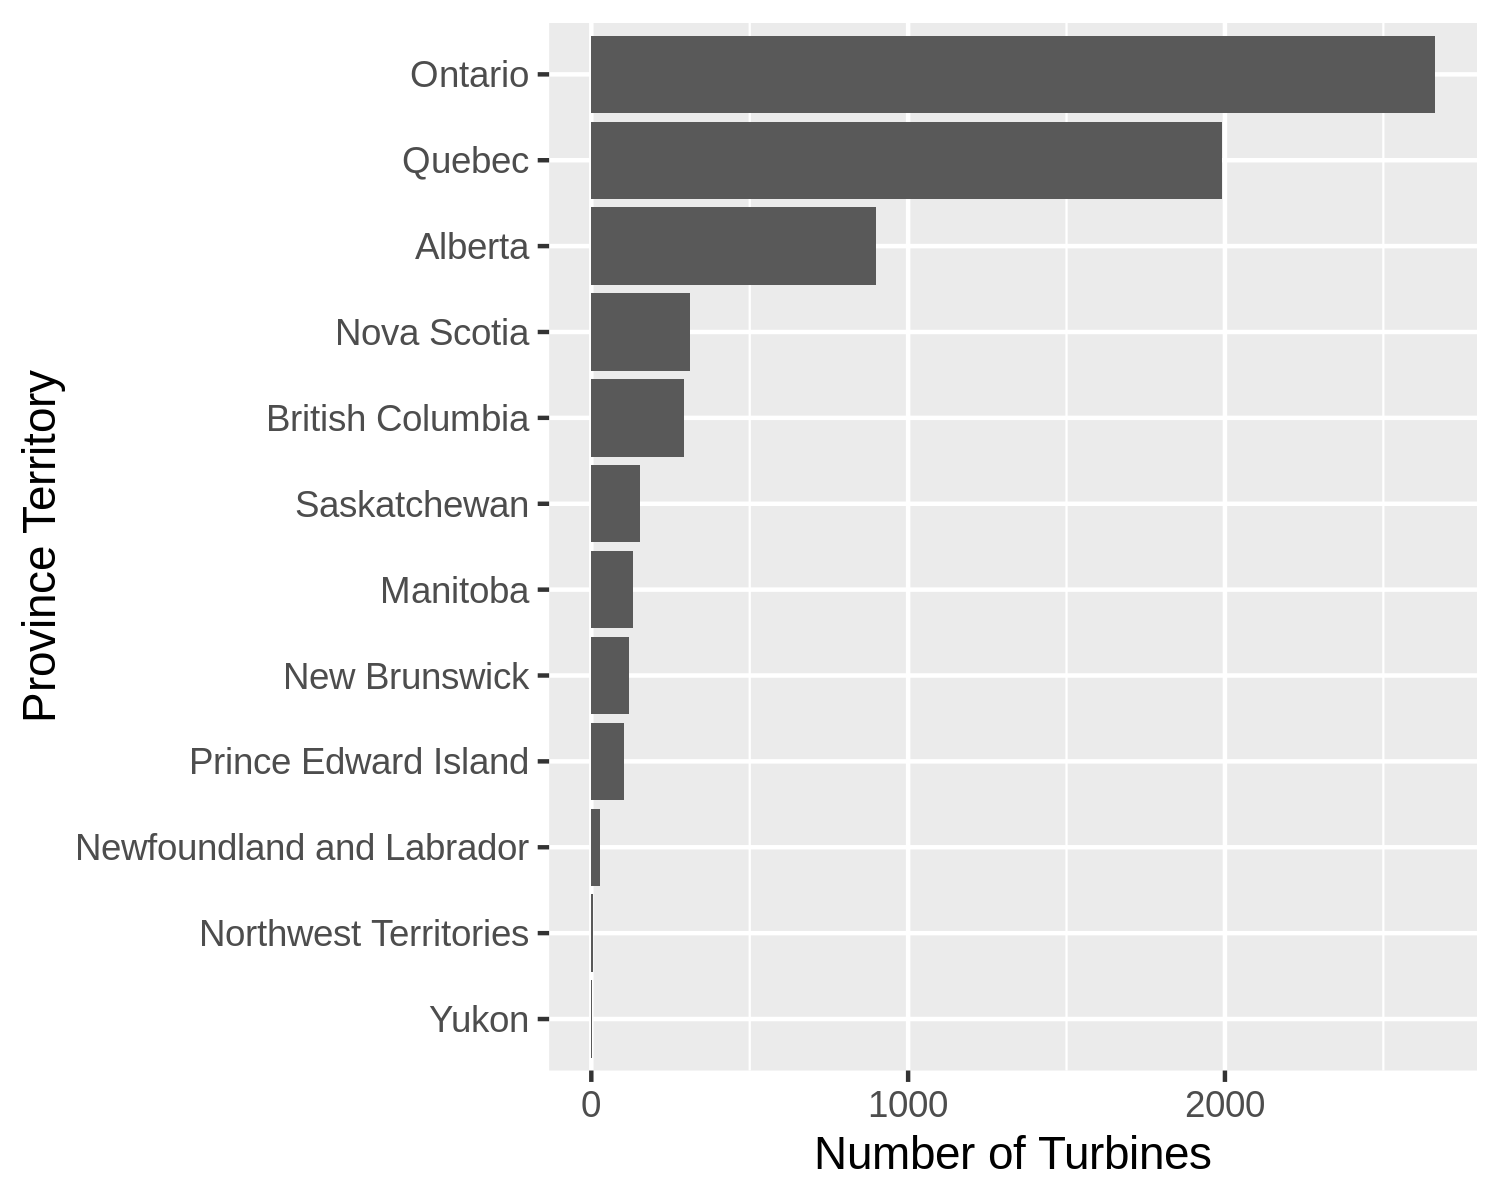

In [21]:
df_sorted = df %>%
    mutate(province_sorted = province_territory %>% fct_infreq() %>% fct_rev()) 

p = ggplot(df_sorted, aes(x = province_sorted))

p = p + geom_bar() + coord_flip()

p = p + xlab("Province Territory") + ylab("Number of Turbines")

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

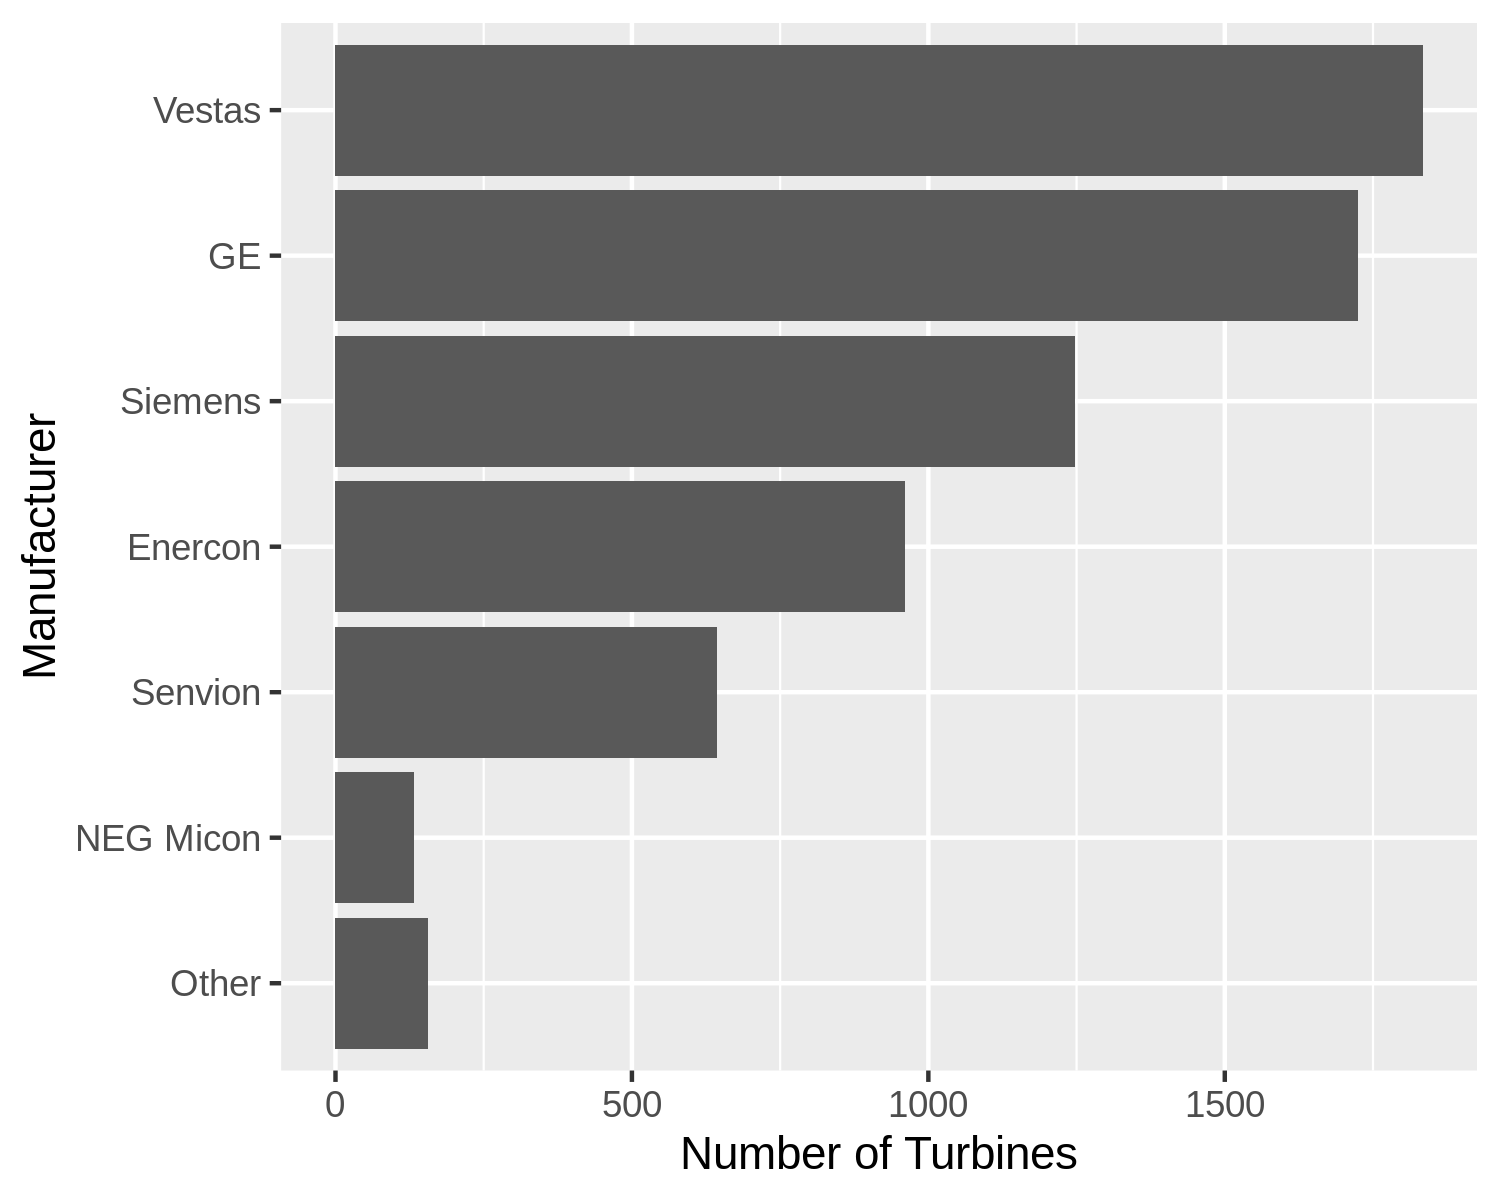

In [28]:
df_sorted2 = df %>%
    mutate(manu_sorted = manufacturer %>% fct_lump(n=6) %>% fct_infreq() %>% fct_relevel('Other', after= Inf) %>% fct_rev())

p = ggplot(df_sorted2, aes(x = manu_sorted))

p = p + geom_bar() + coord_flip()

p = p + xlab("Manufacturer") + ylab("Number of Turbines")

p